<a href="https://colab.research.google.com/github/Sharyu-bot/US-Accidents/blob/main/US_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## US accidents Analysis

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

In [ ]:
data_filename = '/content/us-accidents/US_Accidents_Dec20_Updated.csv'

### Data Preparation and cleaning


In [ ]:
import pandas as pd 

In [ ]:
df = pd.read_csv(data_filename)

In [ ]:
df


In [ ]:
df.columns


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
numeric=('int16','int32','int64','float16','float32','float64')
numeric_df = df.select_dtypes(include=numeric)
len(numeric_df.columns)

In [ ]:
df.isna().sum()

In [ ]:
# Percentage of missing values

df.isna().sum().sort_values(ascending=False)

In [ ]:
missing_percentage=df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentage

In [ ]:
missing_percentage[missing_percentage !=0].plot(kind='barh')

In [ ]:
#remove zero from the column
missing_percentage != 0

### Exploratory anylysis and visualization 
1. city 
2. start time
3. start lat, start longi


In [ ]:
df.columns

In [ ]:
df.City.unique()

In [ ]:
city=df.City.unique()
len(city[:10])

In [ ]:
city_by_accident=df.City.value_counts()
city_by_accident[:10]

In [ ]:
'New York' in df.City

#####High no. of accidents in top 20 cities.

In [ ]:
city_by_accident[:20].plot(kind='barh')

In [ ]:
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
sns.distplot(city_by_accident)

##### Comparing the no. the highest and lowest accidents occured in cities 

In [ ]:
high_accidents_city=city_by_accident[city_by_accident>=1000]

In [ ]:
low_accidents_city=city_by_accident[city_by_accident < 1000]

In [ ]:
len(high_accidents_city)/len(city)

In [ ]:
sns.histplot(high_accidents_city , log_scale=True)

In [ ]:
sns.histplot(low_accidents_city , log_scale=True)

In [ ]:
city_by_accident[city_by_accident==1]

#### Start time

In [ ]:
df.Start_Time[0]

In [ ]:
df.Start_Time=pd.to_datetime(df.Start_Time)

In [ ]:
df.Start_Time.dt.hour

In [ ]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

High percentage no of acciends occur between 6am to 10am (probably due to work rush)
Next high percentage of accidents happen between 3pm to 6pm.

In [ ]:
df.Start_Time[df.Start_Time.dt.dayofweek==6]

In [ ]:
sunday_Start_Time=df.Start_Time[df.Start_Time.dt.dayofweek==6]
sunday_Start_Time

In [ ]:
sns.distplot(sunday_Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

In [ ]:
months_Start_Time=df.Start_Time[df.Start_Time.dt.month==12]
months_Start_Time

In [ ]:
sns.distplot(sunday_Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

In [ ]:
monday_Start_Time=df.Start_Time[df.Start_Time.dt.dayofweek==6]
monday_Start_Time

In [ ]:
sns.distplot(monday_Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

In [ ]:
df_2016= df[df.Start_Time.dt.year==2016]


In [ ]:
sns.distplot(df_2016.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

#### Start Latitude and Start Longitude

In [ ]:
df.Start_Lng

In [ ]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat)

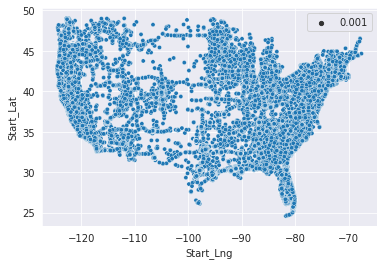

In [ ]:
sample_df = df.sample(int(0.1*len(df)))
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [ ]:
import folium

In [ ]:
folium.Map(location = [38.9, -77.05],zoom_start=12)

In [ ]:
map=folium.Map()

In [ ]:
lat,lng = df.Start_Lat[0],df.Start_Lng[0]
lat,lng

In [ ]:
map=folium.Map()
marker=folium.Marker((lat,lng))
marker.add_to(map)
map

In [ ]:
for x in df[['Start_Lat','Start_Lng']].sample(100).iteritems():
  print(x)

('Start_Lat', 819967     33.941669
2427086    38.917147
717783     35.204933
719060     33.593609
1431726    45.803332
             ...    
2435165    39.875760
582393     39.152046
1374323    35.263777
686480     39.564968
1004715    30.314735
Name: Start_Lat, Length: 100, dtype: float64)
('Start_Lng', 819967    -117.277519
2427086   -121.561751
717783     -80.824303
719060     -81.724709
1431726   -119.439547
              ...    
2435165    -75.102270
582393     -76.645584
1374323   -118.633176
686480     -77.294823
1004715    -81.792831
Name: Start_Lng, Length: 100, dtype: float64)


Heat Map


In [137]:
from folium.plugins import HeatMap
map = folium.Map()
heat_data = list(zip(list(df.Start_Lat),list(df.Start_Lng)))

In [ ]:
HeatMap(heat_data).add_to(map)
map

In [ ]:
sample_df=df.sample(int(0.001*len(df)))
lat_lon_pairs=list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))

In [ ]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

### Ask and Answer Questions 

1. which 5 states has the highest accidents? per capita? Answered
2. is the no. accidents per city decreses / increases expontially? Answered
3. what time of the day are accidents mostly occur? Answered 
4. which days of the week have the most accidents? Answered
5. which months have the most accidents? Answered

###Conclusion 
1. no data for new york
2. more than 1200 cities have reported accidents
3. at the end of the year accidents seems to occur more
6. Data is missing in 2016
7. The accidents occur in most of coastal areas.